# Вариант 13. Задания 5.1.13, 5.3.6, 5.5.7, 5.8.7

## Задание 5.1.13

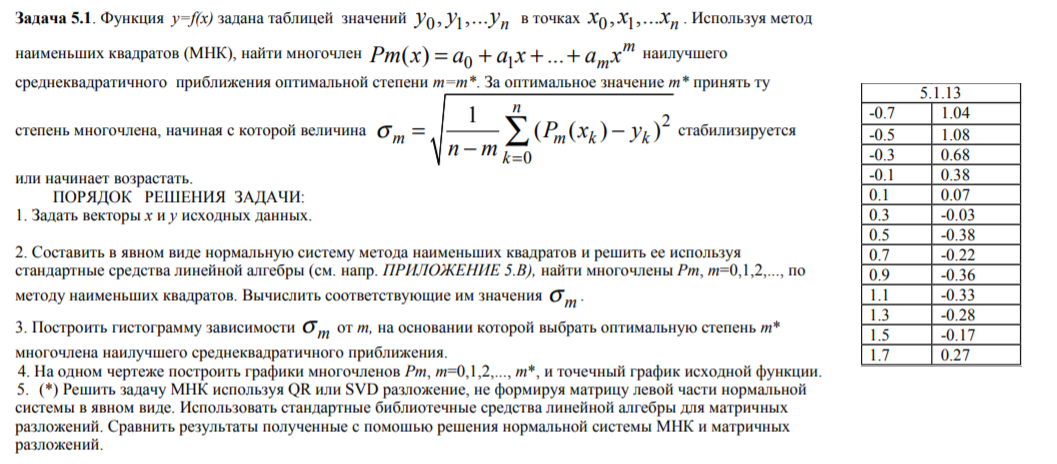

In [58]:
from IPython.display import Image
import numpy as np
from scipy.linalg import solve_triangular
from matplotlib import pyplot as plt
%matplotlib inline
Image("5.1.png")

In [59]:
x = np.linspace(-0.7, 1.7, 13).reshape(-1,1)
y = np.array([1.04, 1.08, 0.68, 0.38, 0.07, -0.03,-0.38, -0.22, -0.36, -0.33, -0.28, -0.17, 0.27])

In [60]:
def sigma_func(A, coefs, y, m):
    P = np.dot(A,coefs)
    n = y.shape[0]
    return np.sqrt(1/(n - m)*np.sum((P-y)**2))

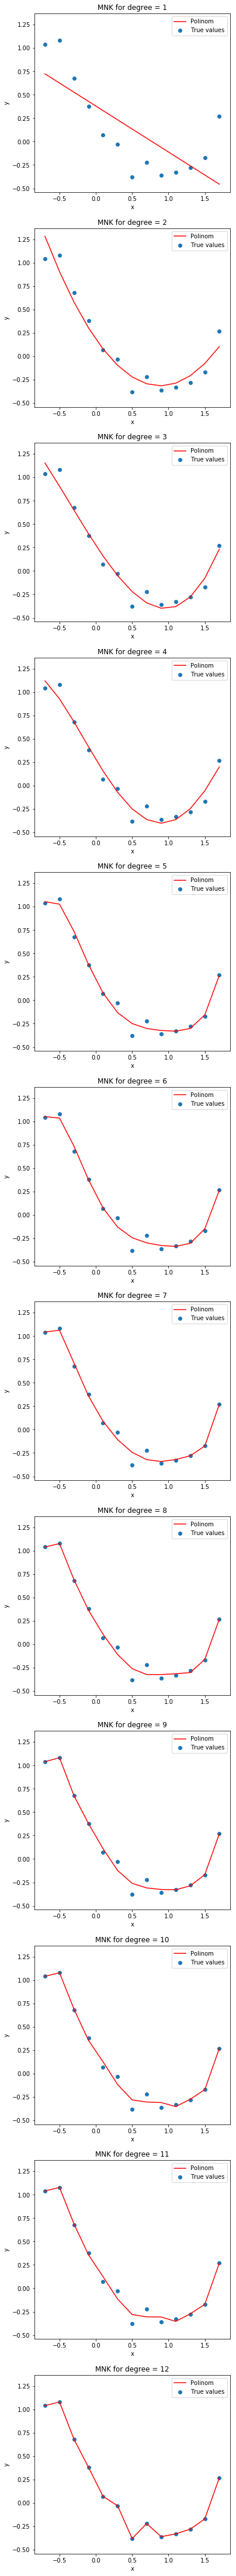

In [61]:
A = np.ones(len(x)).reshape(-1,1)
coefs = []
sigma = []
f, ax = plt.subplots(12, 1, sharey=True, figsize = (6,80))
for i in range (1, len(x)):
    A = np.hstack([A, x.reshape(-1,1)**i])
    coefs.append(np.linalg.lstsq(A, y, rcond=None)[0])
    sigma.append(sigma_func(A, coefs[i-1], y, i))
    ax[i-1].plot(x, np.dot(A,coefs[i-1]), c = 'r')
    ax[i-1].scatter(x,y)
    ax[i-1].set_title("MNK for degree = " + str(i))
    ax[i-1].set_xlabel('x')
    ax[i-1].set_ylabel('y')
    ax[i-1].legend(('Polinom','True values'))

### Построим гистограмму зависимости сигма от степени полинома и выберем оптимальную степени m*

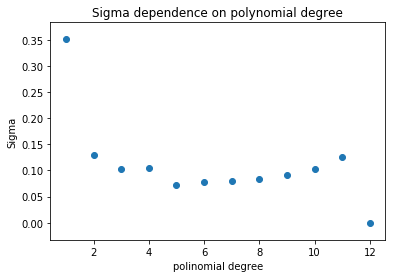

In [62]:
plt.scatter(np.arange(1,13),sigma)
plt.title("Sigma dependence on polynomial degree")
plt.xlabel('polinomial degree')
plt.ylabel('Sigma');

### По графику видно, что величина сигма для 5 степени минимальна и затем её значения стабилизируются, так что m* = 5

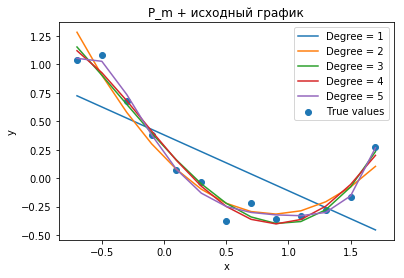

In [63]:
m_star = 5
legend = []
for i in range(1,m_star + 1):
    plt.plot(x,np.dot(A[:,:i+1],coefs[i-1]))
    legend.append("Degree = " + str(i))
plt.scatter(x,y)
legend.append("True values")
plt.title("P_m + исходный график")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(legend);

# Решение МНК с помощью QR


$A^TAw = A^Ty$

$A = QR$

$A^T = R^TQ^T$

$A^TA = R^TQ^TQR = R^TR$

$R^TRw = R^TQ^Ty$

$Rw = Q^Ty$

In [64]:
def QR_MNK(A,y):
    Q, R = np.linalg.qr(A)
    w = solve_triangular(R, np.dot(Q.T,y))
    return w

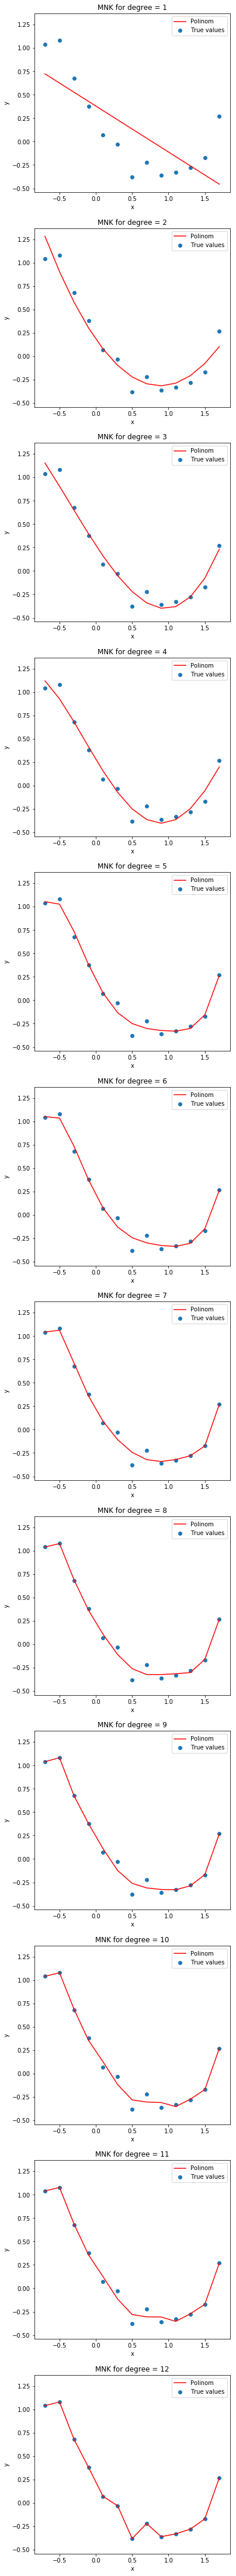

In [65]:
A = np.ones(len(x)).reshape(-1,1)
coefs_2 = []
sigma = []
f, ax = plt.subplots(12, 1, sharey=True, figsize = (6,80))
for i in range (1, len(x)):
    A = np.hstack([A, x.reshape(-1,1)**i])
    coefs_2.append(QR_MNK(A,y))
    sigma.append(sigma_func(A, coefs[i-1], y, i))
    ax[i-1].plot(x, np.dot(A,coefs[i-1]), c = 'r')
    ax[i-1].scatter(x,y)
    ax[i-1].set_title("MNK for degree = " + str(i))
    ax[i-1].set_xlabel('x')
    ax[i-1].set_ylabel('y')
    ax[i-1].legend(('Polinom','True values'))

### Сравним коэффициенты для многочлена 5й степени, полученные с использованием QR и без него.

In [66]:
print(np.allclose(coefs[4], coefs_2[4]))

True


# Задание 5.3.6

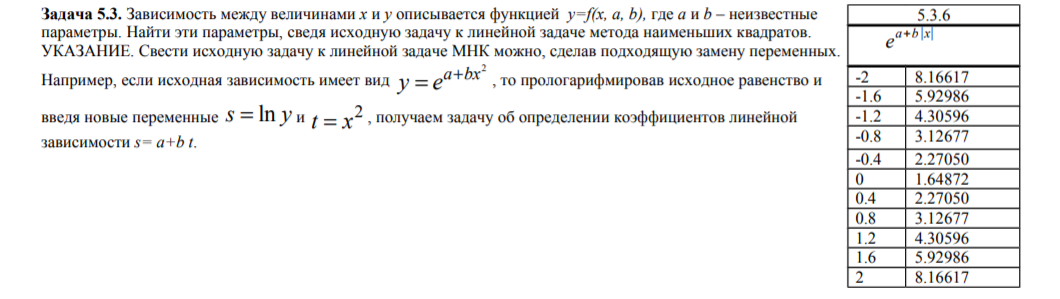

In [67]:
Image("5.3.png")

In [68]:
x = np.linspace(-2,2,11)
y = np.array([8.16617,5.92986, 4.30596, 3.12677, 2.27050, 1.64872, 2.27050, 3.12677, 4.30596, 5.92986, 8.16617])

## Сведём исходную задачу к линейной, сделав замену.

In [69]:
s = np.log(y)
t = np.abs(x)

## Найдём параметры a и b методом наименьших квадратов.

In [70]:
A = np.hstack([np.ones(len(x)).reshape(-1,1), t.reshape(-1,1)])
a,b = np.linalg.lstsq(A, s, rcond=None)[0]

## Построим график и стравним полученную кривую с исходными данными

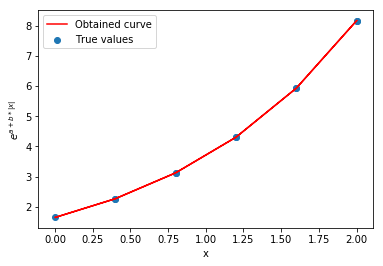

In [71]:
plt.scatter(t,y)
plt.plot(t,np.exp(a + b * t),c = 'r')
plt.xlabel('x')
plt.ylabel('$e^{a + b*|x|}$')
plt.legend(('Obtained curve','True values'));

In [72]:
print("Максимальное отклонение от верного ответа = ", max(np.abs(np.exp(a + b * t) - y)))

Максимальное отклонение от верного ответа =  3.10269597925128e-06


# Задание 5.5.7

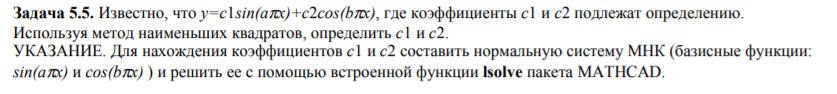

In [73]:
Image("5.5.png")

In [74]:
y = np.array([3.053, 0.945, -2.45, -2.4651, 0.4665, 3.052,0.9463, -2.4652, 
              -2.467, 0.94, 3.053, 0.9417, -2.4703, -2.4712, 0.938, 3.042, 0.933, -2.472, -2.471, 0.942, 3.052])
x = -1 + 0.1 * np.arange(21)
a = 1
b = 4

## Сведём исходную задачу к линейной, сделав замену.

In [75]:
x_1 = np.sin(a*np.pi*x)
x_2 = np.cos(b*np.pi*x)

In [76]:
A = np.hstack([x_1.reshape(-1,1), x_2.reshape(-1,1)])

In [77]:
c1, c2 = np.linalg.lstsq(A, y, rcond=None)[0]

## Построим график и стравним полученную кривую с исходными данными

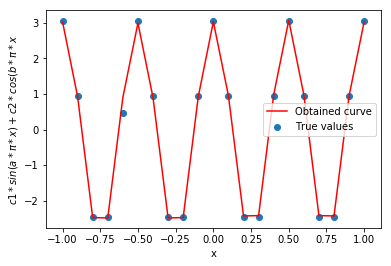

In [78]:
plt.scatter(x,y)
plt.plot(x,c1*x_1 + c2*x_2, c = 'r')
plt.xlabel('x')
plt.ylabel('$c1*sin(a*\pi*x)+c2*cos(b*\pi*x$')
plt.legend(('Obtained curve','True values'));

In [79]:
print("Максимальное отклонение от верного ответа = ", max(np.abs(c1*x_1 + c2*x_2 - y)))

Максимальное отклонение от верного ответа =  0.4335348312529116


# Задание 5.8.7

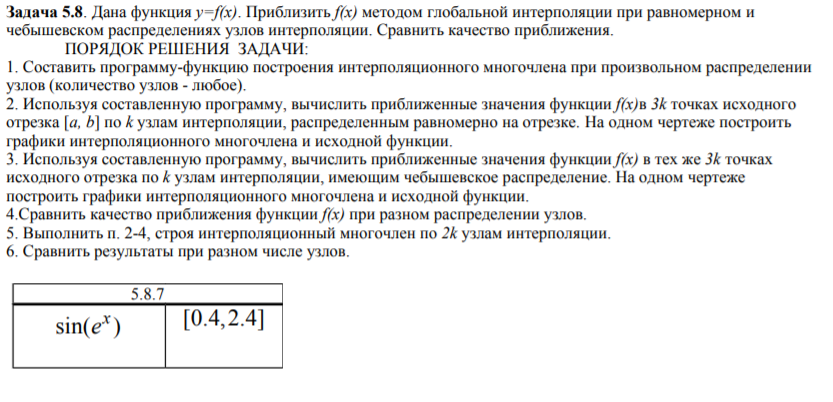

In [80]:
Image('5.8.png')

In [139]:
a = 0.4
b = 2.4
k = 30

def func(x):
    return np.sin(np.exp(x))

def lagrange(x,x_vec, k):
    l = 1
    for i in range(len(x_vec)):
        if i != k:
            l*= (x - x_vec[i])/(x_vec[k] - x_vec[i])
    return l
'''def lagrange_log(x,x_vec, k):
    l = 0
    for i in range(len(x_vec)):
        print(l,np.log((x - x_vec[i])), np.log((x_vec[k] - x_vec[i])))
        if i != k:
            l+= np.log((x - x_vec[i])) - np.log((x_vec[k] - x_vec[i]))
    l = np.exp(l)
    return l'''

def interpolator(x, k, x_vec, y, lagrange = lagrange):
    res = 0
    for i in range(len(x_vec)):
        res += y[i]*lagrange(x, x_vec, i);
    return res
    
def Chebyshev_polinomial(x,n):
    if n == 0:
        return 1
    else:
        return np.sum([2**(i-1)*x**i for i in range(n,0,-1)])
        

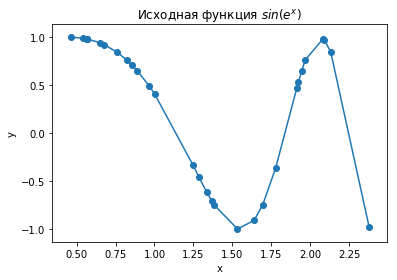

In [140]:
x = np.sort(np.random.uniform(a,b,k))
x_chebyshev = np.sort(np.array([(a - b)/2*np.cos((2*i+1)*np.pi/2/(k+1)) + (a+b)/2 for i in range(k)]))
y = func(x)
y_chebyshev = func(x_chebyshev)
plt.title("Исходная функция $sin(e^x)$")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y)
plt.scatter(x,y);

###  Вычислим приближенные значения функции f(x)в 3k точках исходного отрезка [a, b] по k узлам интерполяции, распределенным равномерно на отрезке.

In [141]:
x_new_3 = np.sort(np.random.uniform(a,b,3*k))
y_new_3 = interpolator(x_new_3, k, x, y)
y_true_3k = func(x_new_3)

### Построим график исходной функции и интерполяционного многочлена на 3k точках

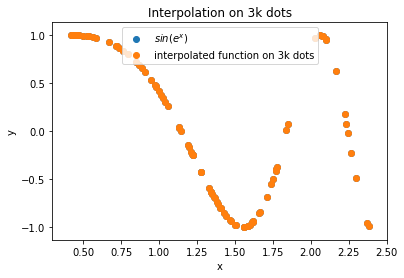

In [142]:
plt.scatter(x_new_3,y_true_3k)
plt.scatter(x_new_3,y_new_3)
plt.title("Interpolation on 3k dots")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(("$sin(e^x)$","interpolated function on 3k dots"));

In [143]:
print("Максимальная ошибка на y =", max(np.abs(y_new_3 - y_true_3k)))
print("Суммарная ошибка = ", np.sum(np.abs(y_new_3 - y_true_3k)))

Максимальная ошибка на y = 3.3892749414787815e-06
Суммарная ошибка =  7.693702233266785e-06


###  Вычислим приближенные значения функции f(x)в 3k точках исходного отрезка [a, b] по k узлам интерполяции, имеющим чебышевское распределение.

In [144]:
y_new_3_chebyshev = interpolator(x_new_3, k, x_chebyshev, y)

### Построим график исходной функции и интерполяционного многочлена(с чебышевским распределением узлов) на 3k точках

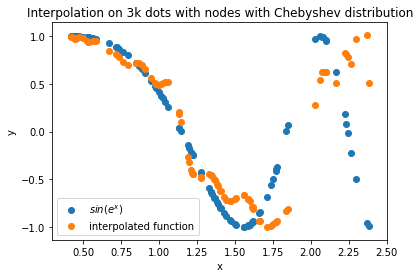

In [145]:
plt.scatter(x_new_3,y_true_3k)
plt.scatter(x_new_3,y_new_3_chebyshev)
plt.title("Interpolation on 3k dots with nodes with Chebyshev distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(("$sin(e^x)$","interpolated function"), loc = 'lower left');

In [146]:
print("Максимальная ошибка на y =", max(np.abs(y_new_3_chebyshev - y_true_3k)))
print("Суммарная ошибка = ", np.sum(np.abs(y_new_3_chebyshev - y_true_3k)))

Максимальная ошибка на y = 1.9720392710494856
Суммарная ошибка =  24.060902672222333


### Получилось, что узлы с чебышевским распределением намного хуже приближают...

## Повторим аналогичные шаги для 2k узлов

In [147]:
x_new_2 = np.sort(np.random.uniform(a,b,2*k))
y_new_2 = interpolator(x_new_2, k, x, y)
y_true_2k = func(x_new_2)

### Построим график исходной функции и интерполяции на 2*k точках

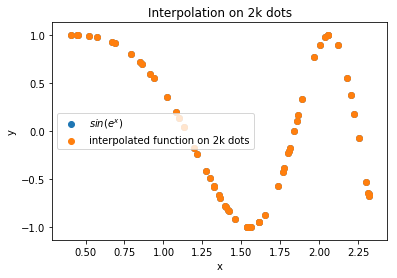

In [148]:
plt.scatter(x_new_2,y_true_2k)
plt.scatter(x_new_2,y_new_2)
plt.title("Interpolation on 2k dots")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(("$sin(e^x)$","interpolated function on 2k dots"));

In [149]:
print("Максимальная ошибка на y =", max(np.abs(y_new_2 - y_true_2k)))
print("Суммарная ошибка = ", np.sum(np.abs(y_new_2 - y_true_2k)))

Максимальная ошибка на y = 4.076406184161385e-06
Суммарная ошибка =  1.233335829728269e-05


### Проделаем аналогичные операции для узлов, имеющих Чебышевское распределение

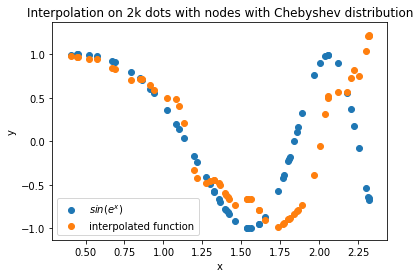

In [150]:
y_new_2_chebyshev = interpolator(x_new_2, k, x_chebyshev, y)
plt.scatter(x_new_2,y_true_2k)
plt.scatter(x_new_2,y_new_2_chebyshev)
plt.title("Interpolation on 2k dots with nodes with Chebyshev distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(("$sin(e^x)$","interpolated function"));

In [151]:
print("Максимальная ошибка на y =", max(np.abs(y_new_2_chebyshev - y_true_2k)))
print("Суммарная ошибка = ", np.sum(np.abs(y_new_2_chebyshev - y_true_2k)))

Максимальная ошибка на y = 1.9007463857345295
Суммарная ошибка =  25.53152745221939


### И снова узлы с чебышевским распределением показывают результат значительно хуже...

## Сравним результаты при разном числе узлов (для равномерно распределённых на отрезке)

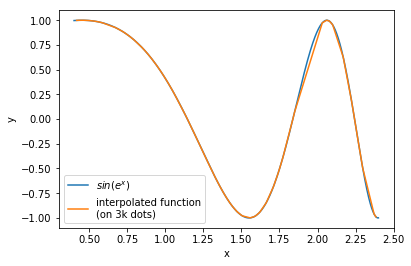

In [167]:
X = np.linspace(a,b,100*k)
Y = func(X)
plt.plot(X,Y)
plt.plot(x_new_3,y_new_3)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(("$sin(e^x)$","interpolated function\n(on 3k dots)"), loc = "lower left");

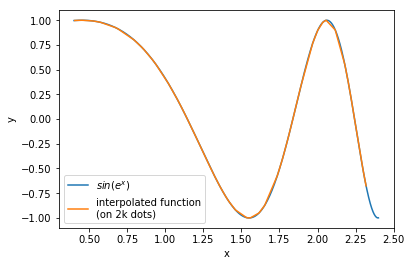

In [168]:
plt.plot(X,Y)
plt.plot(x_new_2,y_new_2)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(("$sin(e^x)$","interpolated function\n(on 2k dots)"), loc = "lower left");

### Визульно кажется, что многочлен на 2к точках приближает лучше. Общая суммарная ошибка для обоих случае примерно одинаковая, обычно чуть больше для 3k точек, что логично, т.к. там на k слагаемых больше)